<a href="https://colab.research.google.com/github/francisco-gamez/Challenge-Telecom-X---2/blob/main/Challenge_Telecom_X_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom X – Parte 2: Predicción de Cancelación (Churn)



## Introducción

Como científico de datos junior vamos a construir un modelo predictivo para ayudar a la empresa Telecom X a anticiparse a la evasión de clientes. Con análisis estadísticos y modelos de Machine Learning



##  Objetivos del Desafío

* Preparar los datos para el modelado (tratamiento, codificación, normalización).

* Realizar análisis de correlación y selección de variables.

* Entrenar dos o más modelos de clasificación.

* Evaluar el rendimiento de los modelos con métricas.

* Interpretar los resultados, incluyendo la importancia de las variables.

* Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

In [104]:
import pandas as pd

datos = pd.read_csv('/content/datos_tratados.csv')
datos.head(10)

,ID_cliente,Abandono,Género,Adulto_mayor,Pareja,Dependientes,Meses_contratados,Servicio_telefónico,Múltiples_líneas,Servicio_Internet,...,Soporte_técnico,Televisión_por_cable,Streaming_de_películas,Tipo_contrato,Factura_electrónica,Método_de_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias,Servicios_Activos
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667,3
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667,1
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333,1
3,0011-IGKFF,Yes,Male,Sí,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667,4
4,0013-EXCHZ,Yes,Female,Sí,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667,2
5,0013-MHZWF,No,Female,No,No,Yes,9,Yes,No,DSL,...,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45,2.313333,3
6,0013-SMEOE,No,Female,Sí,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25,3.656667,6
7,0014-BMAQU,No,Male,No,Yes,No,63,Yes,Yes,Fiber optic,...,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80,2.821667,2
8,0015-UOCOJ,No,Female,Sí,No,No,7,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35,1.606667,1
9,0016-QLJIS,No,Female,No,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.90,3.015000,6


## Análisis Orientado

In [105]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_cliente                 7032 non-null   object 
 1   Abandono                   7032 non-null   object 
 2   Género                     7032 non-null   object 
 3   Adulto_mayor               7032 non-null   object 
 4   Pareja                     7032 non-null   object 
 5   Dependientes               7032 non-null   object 
 6   Meses_contratados          7032 non-null   int64  
 7   Servicio_telefónico        7032 non-null   object 
 8   Múltiples_líneas           7032 non-null   object 
 9   Servicio_Internet          7032 non-null   object 
 10  Seguridad_en_línea         7032 non-null   object 
 11  Respaldo_en_línea          7032 non-null   object 
 12  Protección_de_dispositivo  7032 non-null   object 
 13  Soporte_técnico            7032 non-null   objec

In [106]:
# Eliminar columna ID_cliente
datos = datos.drop(columns=["ID_cliente"])
datos.columns

Index(['Abandono', 'Género', 'Adulto_mayor', 'Pareja', 'Dependientes',
       'Meses_contratados', 'Servicio_telefónico', 'Múltiples_líneas',
       'Servicio_Internet', 'Seguridad_en_línea', 'Respaldo_en_línea',
       'Protección_de_dispositivo', 'Soporte_técnico', 'Televisión_por_cable',
       'Streaming_de_películas', 'Tipo_contrato', 'Factura_electrónica',
       'Método_de_pago', 'Cargos_mensuales', 'Cargos_totales',
       'Cuentas_Diarias', 'Servicios_Activos'],
      dtype='object')

In [107]:
datos.describe()

,Meses_contratados,Cargos_mensuales,Cargos_totales,Cuentas_Diarias,Servicios_Activos
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159940,2.038111
std,24.545260,30.085974,2266.771362,1.002866,1.847161
min,1.000000,18.250000,18.800000,0.608333,0.000000
25%,9.000000,35.587500,401.450000,1.186250,0.000000
50%,29.000000,70.350000,1397.475000,2.345000,2.000000
75%,55.000000,89.862500,3794.737500,2.995417,3.000000
max,72.000000,118.750000,8684.800000,3.958333,6.000000


In [108]:
datos.describe(include='O')

,Abandono,Género,Adulto_mayor,Pareja,Dependientes,Servicio_telefónico,Múltiples_líneas,Servicio_Internet,Seguridad_en_línea,Respaldo_en_línea,Protección_de_dispositivo,Soporte_técnico,Televisión_por_cable,Streaming_de_películas,Tipo_contrato,Factura_electrónica,Método_de_pago
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,No,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,5163,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


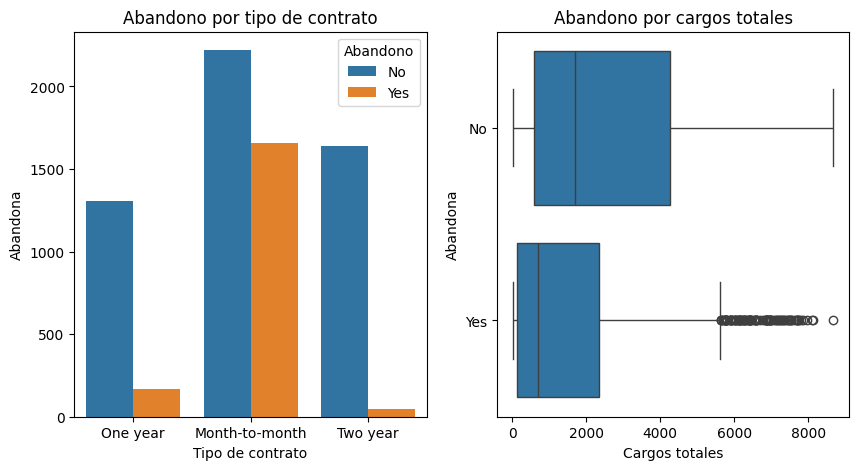

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(10,5))

sns.countplot(data=datos,x='Tipo_contrato',hue='Abandono',ax=ax[0])
ax[0].set_title('Abandono por tipo de contrato')
ax[0].set_xlabel('Tipo de contrato')
ax[0].set_ylabel('Abandona')


sns.boxplot(data=datos[datos['Abandono'].isin(['Yes','No'])],y='Abandono',x='Cargos_totales',ax=ax[1])
ax[1].set_title('Abandono por cargos totales')
ax[1].set_xlabel('Cargos totales')
ax[1].set_ylabel('Abandona')
plt.show()


In [110]:
# Variables binarias
binarias = ['Abandono','Pareja', 'Dependientes','Servicio_telefónico','Factura_electrónica']
datos[binarias] = datos[binarias].replace({'No':0,'Yes':1})
datos['Adulto_mayor'] = datos['Adulto_mayor'].replace({'No':0,'Sí':1})

datos.head()

/tmp/ipython-input-3892972100.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[binarias] = datos[binarias].replace({'No':0,'Yes':1})
/tmp/ipython-input-3892972100.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['Adulto_mayor'] = datos['Adulto_mayor'].replace({'No':0,'Sí':1})


,Abandono,Género,Adulto_mayor,Pareja,Dependientes,Meses_contratados,Servicio_telefónico,Múltiples_líneas,Servicio_Internet,Seguridad_en_línea,...,Soporte_técnico,Televisión_por_cable,Streaming_de_películas,Tipo_contrato,Factura_electrónica,Método_de_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias,Servicios_Activos
0,0,Female,0,1,1,9,1,No,DSL,No,...,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667,3
1,0,Male,0,0,0,9,1,Yes,DSL,No,...,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667,1
2,1,Male,0,0,0,4,1,No,Fiber optic,No,...,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333,1
3,1,Male,1,1,0,13,1,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,4
4,1,Female,1,1,0,3,1,No,Fiber optic,No,...,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667,2


In [111]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Abandono                   7032 non-null   int64  
 1   Género                     7032 non-null   object 
 2   Adulto_mayor               7032 non-null   int64  
 3   Pareja                     7032 non-null   int64  
 4   Dependientes               7032 non-null   int64  
 5   Meses_contratados          7032 non-null   int64  
 6   Servicio_telefónico        7032 non-null   int64  
 7   Múltiples_líneas           7032 non-null   object 
 8   Servicio_Internet          7032 non-null   object 
 9   Seguridad_en_línea         7032 non-null   object 
 10  Respaldo_en_línea          7032 non-null   object 
 11  Protección_de_dispositivo  7032 non-null   object 
 12  Soporte_técnico            7032 non-null   object 
 13  Televisión_por_cable       7032 non-null   objec

In [112]:
# Variables categóricas
categoricas = ['Género','Múltiples_líneas','Servicio_Internet','Seguridad_en_línea',
               'Respaldo_en_línea','Protección_de_dispositivo',
               'Soporte_técnico','Televisión_por_cable','Streaming_de_películas',
               'Tipo_contrato','Método_de_pago']

datos = pd.get_dummies(data=datos, columns=categoricas,dtype=int)
datos.sample(5)

,Abandono,Adulto_mayor,Pareja,Dependientes,Meses_contratados,Servicio_telefónico,Factura_electrónica,Cargos_mensuales,Cargos_totales,Cuentas_Diarias,...,Streaming_de_películas_No,Streaming_de_películas_No internet service,Streaming_de_películas_Yes,Tipo_contrato_Month-to-month,Tipo_contrato_One year,Tipo_contrato_Two year,Método_de_pago_Bank transfer (automatic),Método_de_pago_Credit card (automatic),Método_de_pago_Electronic check,Método_de_pago_Mailed check
2062,0,0,0,0,57,1,0,94.70,5468.95,3.156667,...,0,0,1,0,1,0,0,0,1,0
5842,0,0,1,0,64,1,0,89.45,5692.65,2.981667,...,1,0,0,0,1,0,1,0,0,0
2890,0,1,1,0,47,1,0,99.70,4747.20,3.323333,...,0,0,1,1,0,0,0,0,1,0
495,0,0,0,0,36,1,1,89.65,3348.10,2.988333,...,0,0,1,0,1,0,0,1,0,0
6669,0,0,1,1,11,1,0,51.00,581.70,1.700000,...,1,0,0,1,0,0,1,0,0,0


In [113]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 44 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Abandono                                       7032 non-null   int64  
 1   Adulto_mayor                                   7032 non-null   int64  
 2   Pareja                                         7032 non-null   int64  
 3   Dependientes                                   7032 non-null   int64  
 4   Meses_contratados                              7032 non-null   int64  
 5   Servicio_telefónico                            7032 non-null   int64  
 6   Factura_electrónica                            7032 non-null   int64  
 7   Cargos_mensuales                               7032 non-null   float64
 8   Cargos_totales                                 7032 non-null   float64
 9   Cuentas_Diarias                                7032 

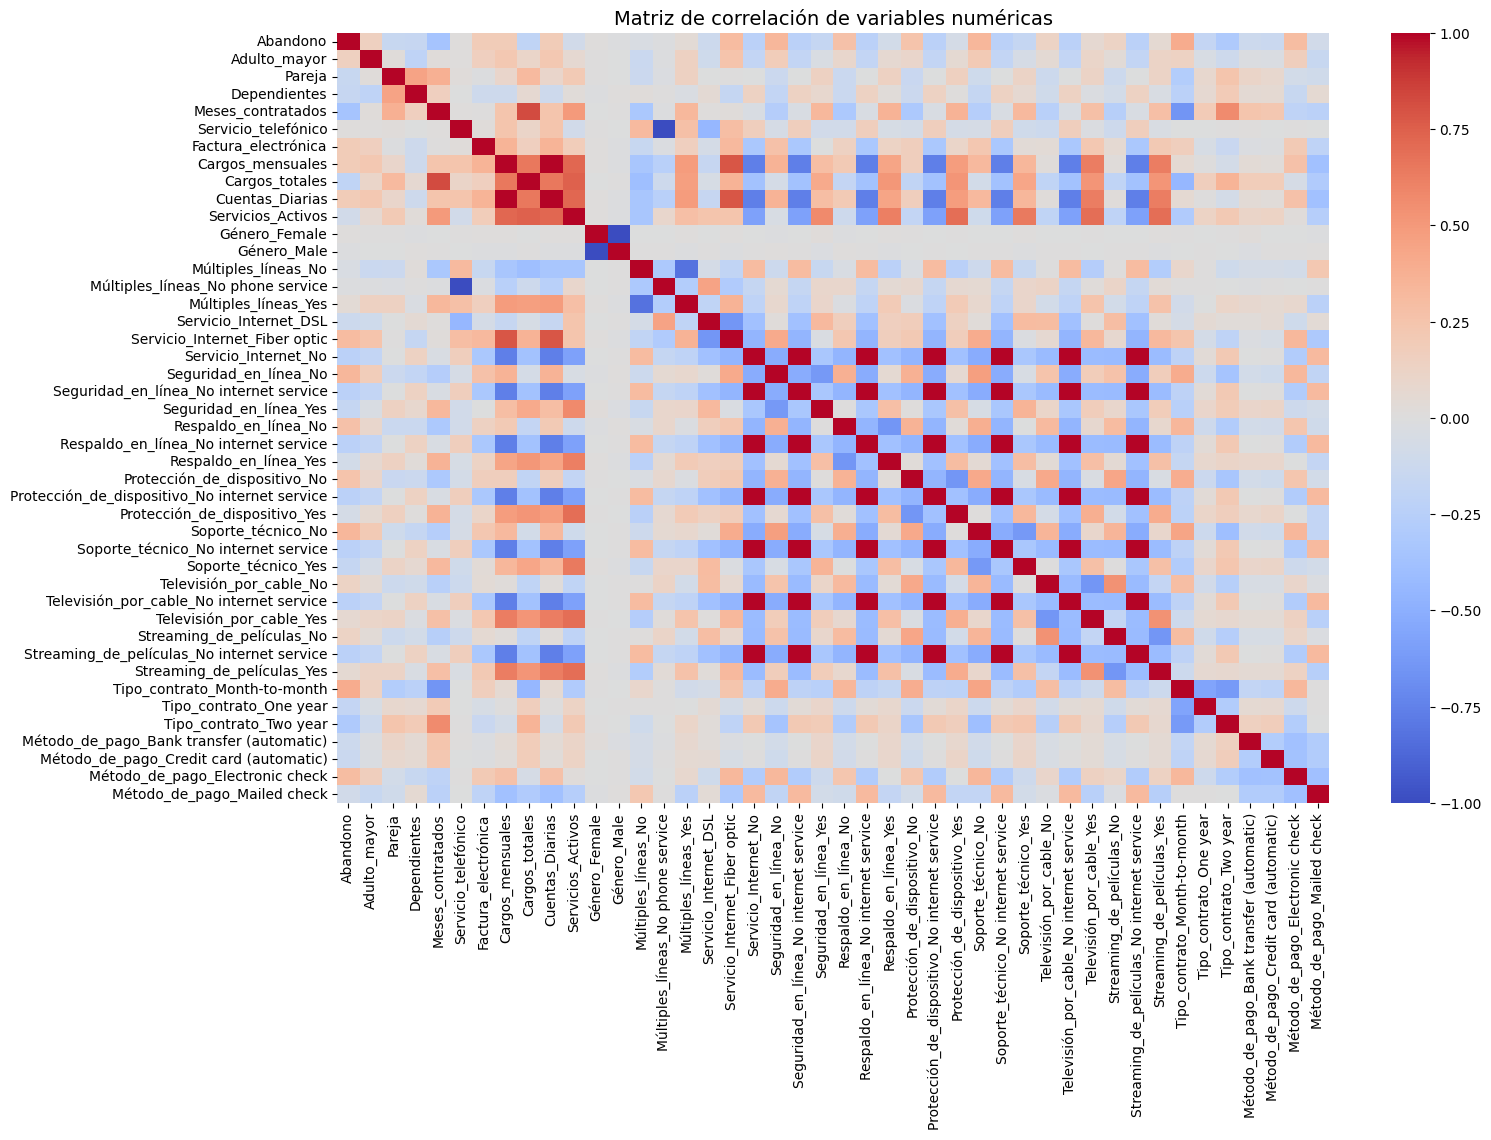

Correlaciones con Abandono:

Abandono                                         1.000000
Tipo_contrato_Month-to-month                     0.404565
Meses_contratados                               -0.354049
Seguridad_en_línea_No                            0.342235
Soporte_técnico_No                               0.336877
Servicio_Internet_Fiber optic                    0.307463
Tipo_contrato_Two year                          -0.301552
Método_de_pago_Electronic check                  0.301455
Respaldo_en_línea_No                             0.267595
Protección_de_dispositivo_No                     0.252056
Televisión_por_cable_No internet service        -0.227578
Seguridad_en_línea_No internet service          -0.227578
Servicio_Internet_No                            -0.227578
Respaldo_en_línea_No internet service           -0.227578
Soporte_técnico_No internet service             -0.227578
Streaming_de_películas_No internet service      -0.227578
Protección_de_dispositivo_No internet servi

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos la matriz de correlación
corr = datos.corr(numeric_only=True)

# Heatmap de correlación completo
plt.figure(figsize=(16,10))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, cbar=True)
plt.title("Matriz de correlación de variables numéricas", fontsize=14)
plt.show()

corr_abandono = corr["Abandono"].sort_values(key=lambda x: x.abs(), ascending=False)

print("Correlaciones con Abandono:\n")
print(corr_abandono)


# Modelado Predictivo

## Dummy

In [163]:
# Generando un modelo dummy como referencia

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

X = datos.drop(columns=['Abandono'],axis=1)
y = datos['Abandono']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

baseline = DummyClassifier()
baseline.fit(X_train,y_train)


DummyClassifier()

In [164]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score

def evaluar_modelo(modelo, X_test, y_test):
    """
    Evalúa un modelo en términos de Accuracy, Precision, Recall, F1-score
    y genera la matriz de confusión.

    Parámetros:
    -----------
    modelo : modelo entrenado (fit)
    X_test : conjunto de prueba (features)
    y_test : conjunto de prueba (target real)
    """
    # Predicciones
    y_pred = modelo.predict(X_test)

    # Métricas
    print("Resultados del modelo:", modelo.__class__.__name__)
    print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision : {precision_score(y_test, y_pred):.4f}")
    print(f"Recall    : {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score  : {f1_score(y_test, y_pred):.4f}")
    print("-"*40)

    # Matriz de confusión
    matriz_conf = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=matriz_conf,
                                  display_labels=['No Abandona','Abandona'])
    disp.plot(cmap="Blues")
    plt.show()


Resultados del modelo: DummyClassifier
Accuracy  : 0.7342
Precision : 0.0000
Recall    : 0.0000
F1-score  : 0.0000
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


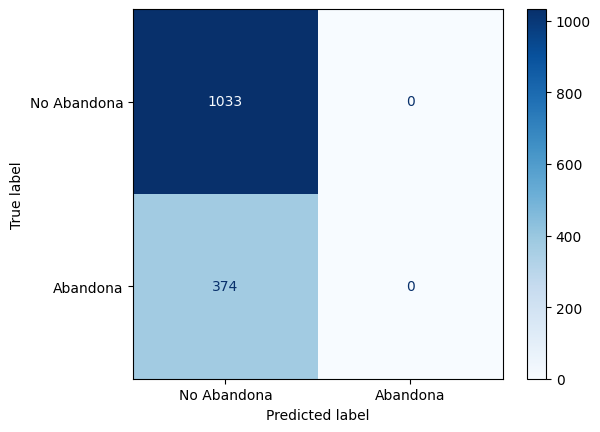

In [165]:
evaluar_modelo(baseline, X_test, y_test)

###Oversampling

### **balanceo mediante Oversampling (SMOTE)**

**Balancea los datos originales**

En el dataset, la mayoría de los clientes **permanecen** en la empresa, mientras que los que **abandonan** son una minoría.
Si entrenábamos un modelo con esos datos desbalanceados, el algoritmo tendería a **“aprender” a predecir siempre la clase mayoritaria**, logrando métricas de exactitud (accuracy) artificialmente altas, pero con muy bajo desempeño en la detección de los clientes que realmente abandonan.

**Impacta en las métricas**

El desbalance afectaba sobre todo a métricas como **recall** y **F1-score**, que son críticas en este caso, porque lo que queremos es **no dejar escapar clientes en riesgo de irse**.

Con SMOTE, el modelo tiene más ejemplos de clientes que abandonan para aprender sus patrones, lo que mejora su capacidad de generalización.

**SMOTE vs. Simple Oversampling**

A diferencia de repetir aleatoriamente los casos minoritarios, **SMOTE genera nuevos ejemplos sintéticos** interpolando entre clientes existentes de la clase minoritaria.
Esto evita que el modelo se “memorice” los casos de churn, y en cambio aprenda patrones más generales.

**Beneficio final**

Gracias al balanceo, el modelo Random Forest puede **mejorar su recall y ROC-AUC**, permitiendo identificar más clientes que realmente abandonan, y aportando información más útil para diseñar **estrategias de retención efectivas**.

In [166]:
# Determinando si es necesario balancear
print(datos['Abandono'].value_counts(normalize=True) * 100)

Abandono
0    73.421502
1    26.578498
Name: proportion, dtype: float64


In [167]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print(y_train_bal.value_counts(normalize=True) * 100)

X_train_bal = pd.DataFrame(X_train_bal, columns=X_train.columns)
y_train_bal = pd.Series(y_train_bal)


Abandono
0    50.0
1    50.0
Name: proportion, dtype: float64


## DecisionTreeClassifer

In [168]:
from sklearn.tree import DecisionTreeClassifier

modelo_arbol = DecisionTreeClassifier(max_depth=5,random_state=42)
modelo_arbol.fit(X_train_bal,y_train_bal)


DecisionTreeClassifier(max_depth=5, random_state=42)

Resultados del modelo: DecisionTreeClassifier
Accuracy  : 0.7193
Precision : 0.4829
Recall    : 0.7914
F1-score  : 0.5998
----------------------------------------


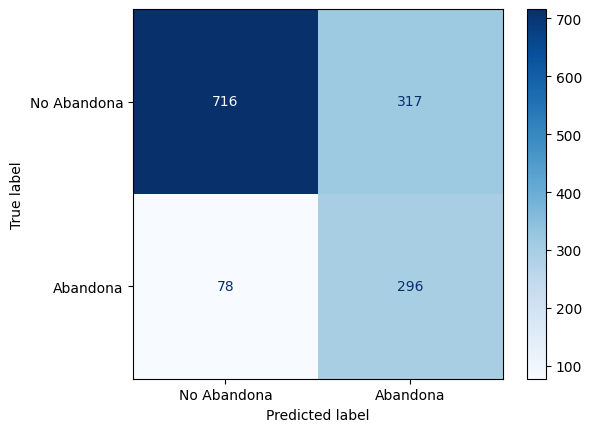

In [169]:
evaluar_modelo(modelo_arbol, X_test, y_test)

In [170]:
datos.columns

Index(['Abandono', 'Adulto_mayor', 'Pareja', 'Dependientes',
       'Meses_contratados', 'Servicio_telefónico', 'Factura_electrónica',
       'Cargos_mensuales', 'Cargos_totales', 'Cuentas_Diarias',
       'Servicios_Activos', 'Género_Female', 'Género_Male',
       'Múltiples_líneas_No', 'Múltiples_líneas_No phone service',
       'Múltiples_líneas_Yes', 'Servicio_Internet_DSL',
       'Servicio_Internet_Fiber optic', 'Servicio_Internet_No',
       'Seguridad_en_línea_No', 'Seguridad_en_línea_No internet service',
       'Seguridad_en_línea_Yes', 'Respaldo_en_línea_No',
       'Respaldo_en_línea_No internet service', 'Respaldo_en_línea_Yes',
       'Protección_de_dispositivo_No',
       'Protección_de_dispositivo_No internet service',
       'Protección_de_dispositivo_Yes', 'Soporte_técnico_No',
       'Soporte_técnico_No internet service', 'Soporte_técnico_Yes',
       'Televisión_por_cable_No', 'Televisión_por_cable_No internet service',
       'Televisión_por_cable_Yes', 'Streaming_

In [171]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

valores_columnas = ['Abandono', 'Adulto_mayor', 'Pareja', 'Dependientes',
                    'Meses_contratados', 'Servicio_telefónico', 'Factura_electrónica',
                    'Cargos_mensuales', 'Cargos_totales', 'Cuentas_Diarias',
                    'Servicios_Activos', 'Género_Female', 'Género_Male',
                    'Múltiples_líneas_No', 'Múltiples_líneas_No phone service',
                    'Múltiples_líneas_Yes', 'Servicio_Internet_DSL',
                    'Servicio_Internet_Fiber optic', 'Servicio_Internet_No',
                    'Seguridad_en_línea_No', 'Seguridad_en_línea_No internet service',
                    'Seguridad_en_línea_Yes', 'Respaldo_en_línea_No',
                    'Respaldo_en_línea_No internet service', 'Respaldo_en_línea_Yes',
                    'Protección_de_dispositivo_No',
                    'Protección_de_dispositivo_No internet service',
                    'Protección_de_dispositivo_Yes', 'Soporte_técnico_No',
                    'Soporte_técnico_No internet service', 'Soporte_técnico_Yes',
                    'Televisión_por_cable_No', 'Televisión_por_cable_No internet service',
                    'Televisión_por_cable_Yes', 'Streaming_de_películas_No',
                    'Streaming_de_películas_No internet service',
                    'Streaming_de_películas_Yes', 'Tipo_contrato_Month-to-month',
                    'Tipo_contrato_One year', 'Tipo_contrato_Two year',
                    'Método_de_pago_Bank transfer (automatic)',
                    'Método_de_pago_Credit card (automatic)',
                    'Método_de_pago_Electronic check', 'Método_de_pago_Mailed check']

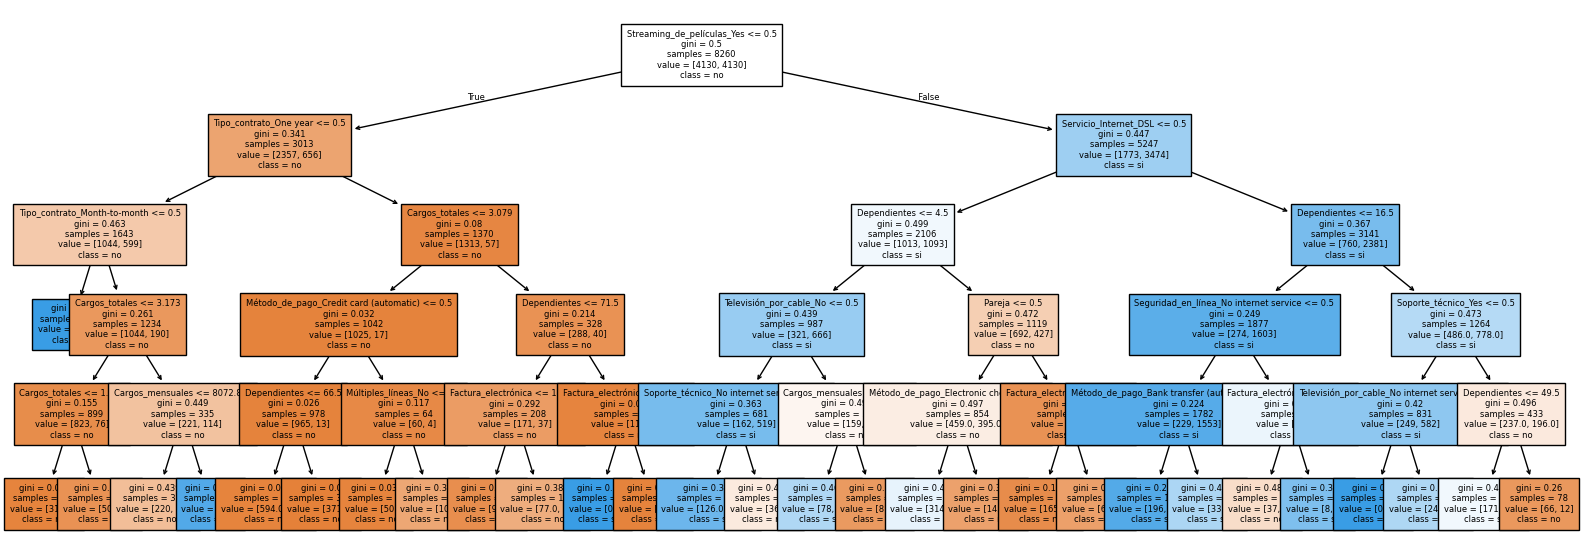

In [172]:
plt.figure(figsize=(20,7))
plot_tree(modelo_arbol,filled=True,class_names=['no','si'],fontsize=6,feature_names=valores_columnas);

### Validación cruzada usando Kflod

In [173]:
from sklearn.model_selection import KFold, cross_validate

modelo_KFold = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5,shuffle=True, random_state=42)
cv_resultados = cross_validate(modelo_KFold,X,y,cv=kf)
cv_resultados



{'fit_time': array([0.04672551, 0.04542971, 0.04444885, 0.0448966 , 0.04590273]),
 'score_time': array([0.0036087 , 0.00350928, 0.00424409, 0.00349784, 0.0037365 ]),
 'test_score': array([0.74840085, 0.7803838 , 0.73755334, 0.76671408, 0.76173542])}

In [174]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvio típico es de: {desvio_std}')
print(f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]')

El promedio de la exactitud es de: 0.7589574986275693
El desvio típico es de: 0.014809107221344082
El intervalo de confianza es: [0.7293392841848811,0.7885757130702575]


## RandomForestClassifer

In [175]:
from sklearn.ensemble import RandomForestClassifier

modelo_bosque = RandomForestClassifier(max_depth=5,random_state=42)
modelo_bosque.fit(X_train_bal,y_train_bal)


RandomForestClassifier(max_depth=5, random_state=42)

Resultados del modelo: RandomForestClassifier
Accuracy  : 0.7555
Precision : 0.5270
Recall    : 0.7834
F1-score  : 0.6301
----------------------------------------


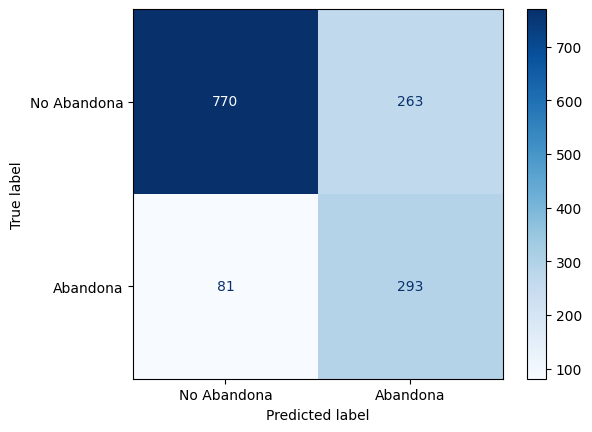

In [176]:
evaluar_modelo(modelo_bosque, X_test, y_test)

In [177]:
importances = modelo_bosque.feature_importances_

feature_importances = pd.DataFrame({'Features':X.columns,'Importances':(importances*100).round(2)}).sort_values('Importances',ascending=False)


In [178]:
def calcular_metricas(y_test,y_pred):
  Precision = precision_score(y_test,y_pred)
  #sensibilidad
  Recall = recall_score(y_test,y_pred)
  #exactitud
  accuracy = accuracy_score(y_test,y_pred)
  F1Score = f1_score(y_test,y_pred)
  metricas = {
      'Precision':round(Precision,4),
      'Recall':round(Recall,4),
      'Accuracy':round(accuracy,4),
      'F1Score':round(F1Score,4)
  }
  return metricas

y_pred = modelo_bosque.predict(X_test)
calcular_metricas(y_test, y_pred)

{'Precision': 0.527, 'Recall': 0.7834, 'Accuracy': 0.7555, 'F1Score': 0.6301}

In [179]:

resultados = pd.DataFrame(index=['Precision', 'Recall','Accuracy','F1Score'])
model_features = RandomForestClassifier(max_depth=5,random_state=42)
ct_features = [i if i !=0 else 1 for i in range(0,35,5)]

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_metricas(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,1,5,10,15,20,25,30
Precision,0.0000,0.6154,0.6840,0.6831,0.6820,0.7089,0.7082
Recall,0.0000,0.3422,0.3877,0.4439,0.4759,0.4492,0.4412
Accuracy,0.7342,0.7683,0.7896,0.7974,0.8017,0.8045,0.8031
F1Score,0.0000,0.4399,0.4949,0.5381,0.5606,0.5499,0.5437


In [180]:
resultados = pd.DataFrame(index=['Precision', 'Recall','Accuracy','F1Score'])
model_features = RandomForestClassifier(max_depth=5,random_state=42)
ct_features = range(15,21)

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_metricas(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados

,15,16,17,18,19,20
Precision,0.6831,0.6890,0.6875,0.6955,0.6567,0.6820
Recall,0.4439,0.4679,0.4412,0.4519,0.4706,0.4759
Accuracy,0.7974,0.8024,0.7982,0.8017,0.7939,0.8017
F1Score,0.5381,0.5573,0.5375,0.5478,0.5483,0.5606


In [181]:
selected_features = feature_importances['Features'].values[:20]
X_selected_features = X[selected_features]
X_selected_features

,Tipo_contrato_Month-to-month,Tipo_contrato_Two year,Meses_contratados,Soporte_técnico_Yes,Seguridad_en_línea_Yes,Tipo_contrato_One year,Cargos_totales,Servicio_Internet_Fiber optic,Dependientes,Pareja,Cuentas_Diarias,Servicio_Internet_DSL,Protección_de_dispositivo_No internet service,Streaming_de_películas_No internet service,Cargos_mensuales,Seguridad_en_línea_No internet service,Servicio_Internet_No,Televisión_por_cable_No internet service,Soporte_técnico_No,Soporte_técnico_No internet service
0,0,0,9,1,0,1,593.30,0,1,1,2.186667,1,0,0,65.60,0,0,0,0,0
1,1,0,9,0,0,0,542.40,0,0,0,1.996667,1,0,0,59.90,0,0,0,1,0
2,1,0,4,0,0,0,280.85,1,0,0,2.463333,0,0,0,73.90,0,0,0,1,0
3,1,0,13,0,0,0,1237.85,1,0,1,3.266667,0,0,0,98.00,0,0,0,1,0
4,1,0,3,1,0,0,267.40,1,0,1,2.796667,0,0,0,83.90,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,13,1,1,1,742.90,0,0,0,1.838333,1,0,0,55.15,0,0,0,0,0
7028,1,0,22,0,0,0,1873.70,1,0,1,2.836667,0,0,0,85.10,0,0,0,1,0
7029,1,0,2,0,0,0,92.75,0,0,0,1.676667,1,0,0,50.30,0,0,0,1,0
7030,0,1,67,1,1,0,4627.65,0,1,1,2.261667,1,0,0,67.85,0,0,0,0,0


In [182]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_selected_features, y, test_size=0.2, random_state=42)

In [183]:
param_grid = {
    'max_depth':[5,10,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,4,6],
    'n_estimators':[100,150,200]
}

In [184]:
from sklearn.model_selection import GridSearchCV

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

cv = KFold(n_splits=5, shuffle=True,random_state=45)
model_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                          param_grid=param_grid,scoring=scoring,
                          refit='f1',
                          cv=cv)
model_grid.fit(X_train_bal,y_train_bal)

GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [185]:
model_grid.best_params_

{'max_depth': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

Resultados del modelo: RandomForestClassifier
Accuracy  : 0.7825
Precision : 0.5850
Recall    : 0.6257
F1-score  : 0.6047
----------------------------------------


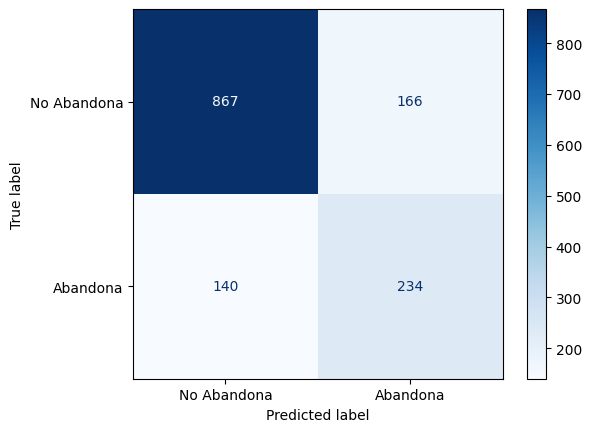

In [187]:
mejor_modelo = model_grid.best_estimator_
evaluar_modelo(mejor_modelo,X_test, y_test)


## KNN

### Escalado

### Importancia del Escalado de Variables

Es necesario aplicar un proceso de **escalado de variables** antes de entrenar  **K-Nearest Neighbors (KNN)** y **Regresión Logística**.

Este paso resulta esencial debido a que ambos modelos son **sensibles a la magnitud de los datos**.

**KNN (K-Nearest Neighbors):** este algoritmo se basa en el cálculo de distancias entre observaciones para identificar patrones de similitud. Si las variables no están en la misma escala, aquellas con valores numéricamente más grandes pueden dominar el cálculo de distancia, restando relevancia a las demás características. El escalado garantiza que **todas las variables tengan un peso equitativo en la determinación de los vecinos más cercanos**, lo cual mejora la capacidad del modelo para detectar correctamente a los clientes con mayor riesgo de evasión.

**Regresión Logística:** en este caso, el escalado no afecta la capacidad predictiva del modelo, pero sí influye en la **estabilidad numérica y en la rapidez de convergencia de los algoritmos de optimización**. Al estandarizar los datos, se evita que variables con diferentes magnitudes generen coeficientes difíciles de interpretar o problemas de convergencia durante el entrenamiento. De esta forma, se logra una **mejor interpretación de los factores que influyen en la cancelación**, manteniendo coherencia entre las variables predictoras.

In [188]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled  = scaler.transform(X_test)



In [189]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-0.402377,1.298529,-0.526736,0.384171,0.337799,-1.237816,-1.671397,-0.619342,-1.671397,-1.089495,...,-0.787959,2.278575,-0.748503,0.757782,-0.419086,-0.445914,2.331960,-0.426051,-0.730873,-0.473357
1,-0.402377,1.298529,1.898483,1.672709,0.337799,0.807874,1.101436,2.099794,1.101436,1.256039,...,-0.787959,-0.438871,1.336000,-1.319642,-0.419086,2.242587,-0.428824,-0.426051,1.368227,-0.473357
2,2.485230,-0.770102,-0.526736,-1.029064,0.337799,-1.237816,0.201666,-0.847632,0.201666,-0.503111,...,1.269102,-0.438871,-0.748503,0.757782,-0.419086,-0.445914,-0.428824,-0.426051,1.368227,-0.473357
3,-0.402377,1.298529,-0.526736,-0.779670,0.337799,0.807874,0.030114,-0.666617,0.030114,1.256039,...,1.269102,-0.438871,-0.748503,0.757782,-0.419086,-0.445914,-0.428824,-0.426051,-0.730873,2.112573
4,-0.402377,1.298529,1.898483,1.173920,0.337799,-1.237816,-0.101175,0.662494,-0.101175,0.083272,...,1.269102,-0.438871,-0.748503,-1.319642,2.386143,-0.445914,2.331960,-0.426051,-0.730873,-0.473357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255,2.485230,-0.770102,-0.526736,-0.571841,0.337799,0.807874,0.314163,-0.436288,0.314163,-1.089495,...,1.269102,-0.438871,-0.748503,0.757782,-0.419086,-0.445914,-0.428824,-0.426051,1.368227,-0.473357
8256,-0.402377,-0.770102,-0.526736,0.966091,0.337799,0.807874,1.320966,1.583572,1.320966,1.256039,...,-0.787959,-0.438871,1.336000,-1.319642,-0.419086,-0.445914,-0.428824,-0.426051,1.368227,-0.473357
8257,-0.402377,-0.770102,-0.526736,-1.029064,-2.960337,0.807874,-1.249075,-0.892084,-1.249075,-0.503111,...,1.269102,-0.438871,-0.748503,0.757782,-0.419086,-0.445914,-0.428824,-0.426051,-0.730873,2.112573
8258,2.485230,-0.770102,-0.526736,-0.530275,0.337799,0.807874,0.335020,-0.412219,0.335020,-0.503111,...,-0.787959,-0.438871,-0.748503,0.757782,-0.419086,-0.445914,-0.428824,-0.426051,-0.730873,-0.473357


In [190]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train_bal)


KNeighborsClassifier()

Resultados del modelo: KNeighborsClassifier
Accuracy  : 0.7512
Precision : 0.5305
Recall    : 0.5588
F1-score  : 0.5443
----------------------------------------


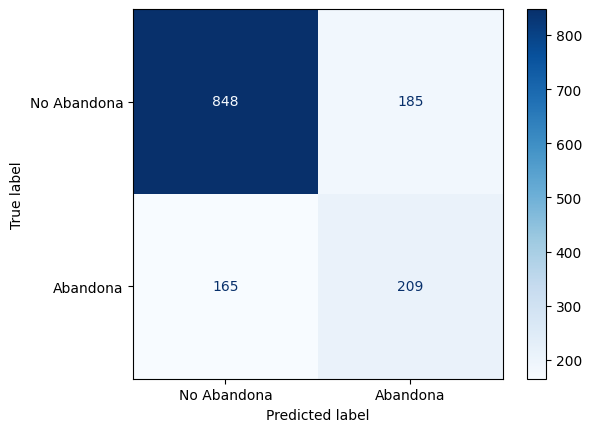

In [191]:
evaluar_modelo(knn, X_test_scaled, y_test)


In [192]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train_bal)


LogisticRegression(max_iter=1000, random_state=42)

Resultados del modelo: LogisticRegression
Accuracy  : 0.7896
Precision : 0.6114
Recall    : 0.5722
F1-score  : 0.5912
----------------------------------------


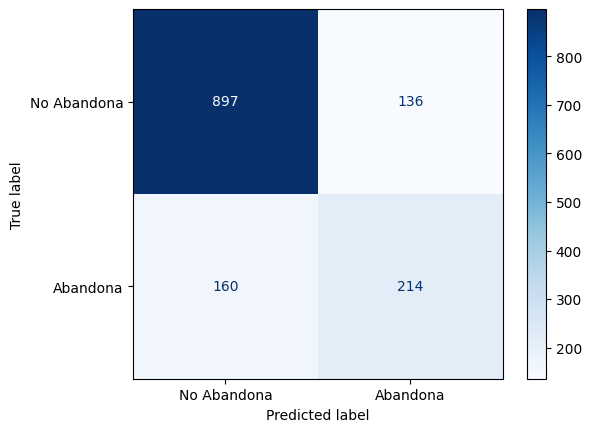

In [193]:
evaluar_modelo(log_reg, X_test_scaled, y_test)


In [196]:
from sklearn.metrics import roc_auc_score

def obtener_metricas(modelo, X_test, y_test, nombre):
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:,1] if hasattr(modelo, "predict_proba") else None

    return {
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    }

# Lista para guardar resultados
resultados = []

# Evaluar cada modelo entrenado
resultados.append(obtener_metricas(baseline, X_test, y_test, "Dummy"))
resultados.append(obtener_metricas(modelo_arbol, X_test, y_test, "Árbol de Decisión"))
resultados.append(obtener_metricas(modelo_bosque, X_test, y_test, "Random Forest"))
resultados.append(obtener_metricas(mejor_modelo, X_test, y_test, "Random Forest (GridSearchCV)"))
resultados.append(obtener_metricas(log_reg, X_test_scaled, y_test, "Regresión Logística"))
resultados.append(obtener_metricas(knn, X_test_scaled, y_test, "KNN"))

# Convertimos a DataFrame
df_resultados = pd.DataFrame(resultados)

df_resultados

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Modelo,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Dummy,0.734186,0.000000,0.000000,0.000000,0.500000
1,Árbol de Decisión,0.719261,0.482871,0.791444,0.599797,0.821738
2,Random Forest,0.755508,0.526978,0.783422,0.630108,0.838898
3,Random Forest (GridSearchCV),0.782516,0.585000,0.625668,0.604651,0.841754
4,Regresión Logística,0.789623,0.611429,0.572193,0.591160,0.843028
5,KNN,0.751244,0.530457,0.558824,0.544271,0.771964


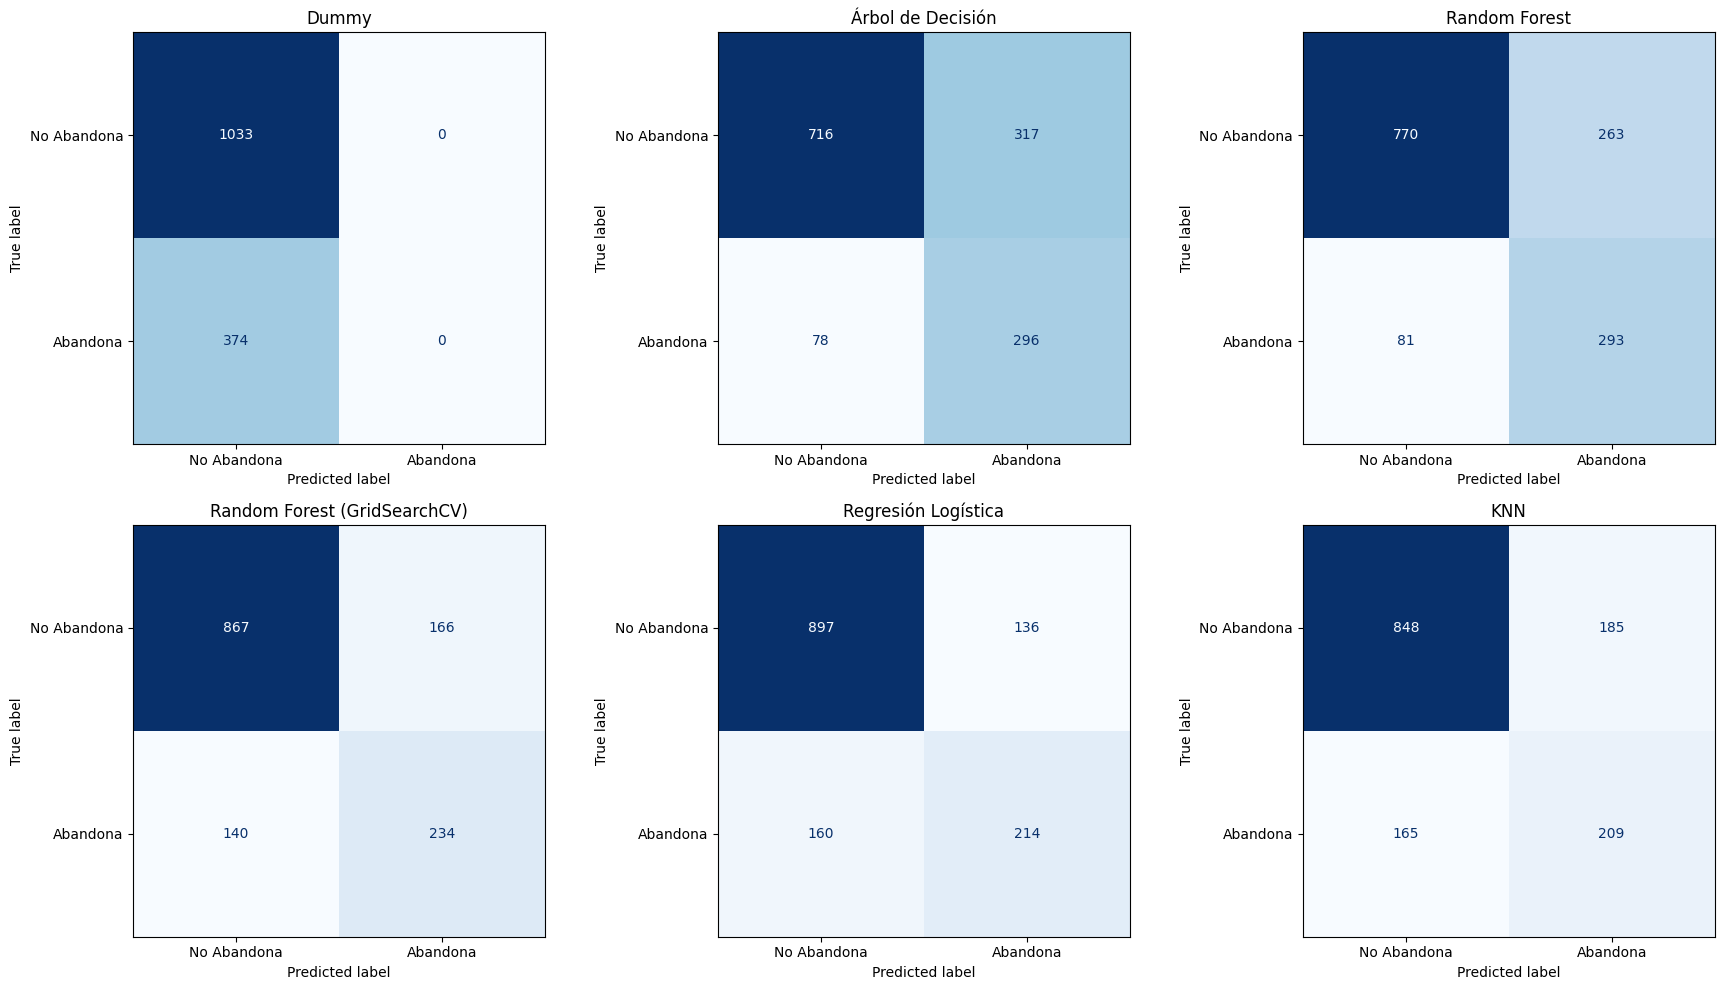

In [197]:
# Lista de modelos y datos
modelos = [
    (baseline, X_test, y_test, "Dummy"),
    (modelo_arbol, X_test, y_test, "Árbol de Decisión"),
    (modelo_bosque, X_test, y_test, "Random Forest"),
    (mejor_modelo, X_test, y_test, "Random Forest (GridSearchCV)"),
    (log_reg, X_test_scaled, y_test, "Regresión Logística"),
    (knn, X_test_scaled, y_test, "KNN")
]

# Configurar tablero: 2 filas x 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()  # Facilita iterar sobre los axes

for i, (modelo, X_eval, y_eval, nombre) in enumerate(modelos):
    y_pred = modelo.predict(X_eval)
    matriz = confusion_matrix(y_eval, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No Abandona','Abandona'])
    disp.plot(ax=axes[i], cmap="Blues", colorbar=False)
    axes[i].set_title(nombre, fontsize=12)

plt.tight_layout()
plt.show()

### Justificación del Modelo RandomForestClassifier

El modelo de **Random Forest** fue seleccionado como el más adecuado para Telecom X por las siguientes razones:

**Precisión superior:**

Obtuvo métricas de desempeño más altas que los modelos de referencia, tanto en **exactitud (accuracy)** como en **recall**, este último crítico para identificar a la mayor cantidad de clientes en riesgo posible.

**Capacidad para manejar datos complejos:**

Puede capturar **relaciones no lineales** y **combinaciones de variables** que influyen en la evasión, algo que modelos simples no logran con la misma eficacia.

**Robustez ante el desbalance de clases:**

Combinado con la técnica de SMOTE, Random Forest mostró **menor sesgo** y una **mayor sensibilidad** hacia los clientes que efectivamente abandonan.

**Interpretabilidad para el negocio:**

Genera un ranking de **importancia de variables**, lo que permite responder directamente:

     * ¿Qué factores pesan más en la decisión de abandonar?
     * ¿Sobre qué dimensiones (contrato, facturación, servicios) debe enfocarse la estrategia de retención?

**Estabilidad del modelo:**

A diferencia de modelos con un solo árbol de decisión, Random Forest reduce el riesgo de **sobreajuste (overfitting)**, entregando predicciones más confiables a largo plazo.

In [201]:
import pandas as pd

importances = pd.DataFrame({
    'Feature': X_train_bal.columns,
    'Importance': modelo_bosque.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances.head(10))


                          Feature  Importance
36   Tipo_contrato_Month-to-month    0.125062
38         Tipo_contrato_Two year    0.111823
3               Meses_contratados    0.092703
29            Soporte_técnico_Yes    0.070735
20         Seguridad_en_línea_Yes    0.062970
37         Tipo_contrato_One year    0.044743
7                  Cargos_totales    0.038696
16  Servicio_Internet_Fiber optic    0.036613
2                    Dependientes    0.035427
1                          Pareja    0.035308


In [204]:
import pickle

try:
  with open('champion.pkl','wb')as file:
    pickle.dump(modelo_bosque,file)
  print('Modelo serializado con éxito')
except Exception as e:
  print('Se presentó un error al almacenar el modelo',str(e))

Modelo serializado con éxito


Conclusión

El análisis comparativo de distintos modelos de Machine Learning permitió evaluar la capacidad predictiva frente al fenómeno de abandono de clientes (churn). El modelo Dummy, utilizado como referencia, mostró que siempre predecir la clase mayoritaria no aporta valor, obteniendo un desempeño nulo en precisión, recall y F1-score.

En contraste, los modelos supervisados —Árbol de Decisión, Random Forest, Regresión Logística y KNN— evidenciaron un aprendizaje real de los patrones de cancelación. Entre ellos, el RandomForestClassifier se posicionó como la mejor alternativa, no solo por su balance entre precisión (0.585), recall (0.625) y F1-score (0.605) en su versión optimizada con GridSearchCV, sino también porque ofrece una interpretabilidad robusta a través de la importancia de las variables, lo cual facilita la toma de decisiones estratégicas.

El análisis de las variables más influyentes revela que los principales factores asociados al churn incluyen:


*   Duración del contrato: los clientes con contratos más cortos tienden a cancelar con mayor frecuencia.
*   Método de pago: el uso de pagos mensuales, en especial vía métodos electrónicos sin domiciliación, se asocia a mayor riesgo de abandono.
*   Uso de servicios adicionales: la falta de servicios complementarios (internet, TV o telefonía) incrementa la probabilidad de cancelación, ya que reduce la percepción de valor agregado.
* Antigüedad del cliente: los clientes con menor tiempo en la compañía presentan mayor propensión a abandonar.

Con base en estos hallazgos, se sugieren las siguientes estrategias de retención:

1. Incentivar la contratación a largo plazo mediante descuentos o beneficios exclusivos, reduciendo la volatilidad de clientes con contratos mensuales.

2. Mejorar los esquemas de pago, promoviendo domiciliación o planes anuales que fomenten permanencia.

3. Diseñar paquetes personalizados de servicios adicionales que incrementen la satisfacción y fidelidad de clientes actuales.

4. Implementar programas de bienvenida y fidelización temprana para clientes de reciente ingreso, reforzando la relación desde los primeros meses.

En conclusión, la adopción del RandomForestClassifier como modelo principal no solo garantiza un mejor desempeño en la predicción de cancelaciones, sino que además aporta información valiosa y accionable sobre los factores que inciden en el abandono, habilitando a la empresa a diseñar estrategias proactivas de retención que impacten directamente en la reducción del churn.